In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# we will first work on train.csv and then on logs.csv as both files at same time are two big for processing.
train = pd.read_csv('./original/train.csv')
train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [3]:
train.dtypes

session_id                  int64
DateTime                   object
user_id                     int64
product                    object
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
product_category_2        float64
user_group_id             float64
gender                     object
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
is_click                    int64
dtype: object

In [4]:
# convert datetime column from object to datetime format.
def add_time_features(df):
    df['date'] = pd.to_datetime(df['DateTime'], infer_datetime_format=True, errors='ignore')
    df['year'] = df['date'].apply(lambda x: x.year)
    df['month'] = df['date'].apply(lambda x: x.month)
    df['day'] = df['date'].apply(lambda x: x.day)
    df['weekday'] = df['date'].apply(lambda x: x.weekday())
    return df
train = add_time_features(train)
train.dtypes

session_id                         int64
DateTime                          object
user_id                            int64
product                           object
campaign_id                        int64
webpage_id                         int64
product_category_1                 int64
product_category_2               float64
user_group_id                    float64
gender                            object
age_level                        float64
user_depth                       float64
city_development_index           float64
var_1                              int64
is_click                           int64
date                      datetime64[ns]
year                               int64
month                              int64
day                                int64
weekday                            int64
dtype: object

In [5]:
train.columns
train[['DateTime','day','weekday']]

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click', 'date', 'year', 'month',
       'day', 'weekday'],
      dtype='object')

,DateTime,day,weekday
0,2017-07-02 00:00,2,6
1,2017-07-02 00:00,2,6
2,2017-07-02 00:00,2,6
3,2017-07-02 00:00,2,6
4,2017-07-02 00:01,2,6
5,2017-07-02 00:01,2,6
6,2017-07-02 00:01,2,6
7,2017-07-02 00:01,2,6
8,2017-07-02 00:02,2,6
9,2017-07-02 00:02,2,6


In [6]:
# as all test and train data is from july 17 so we can remove month and year column from dataframe.
# date is just aggregation of all columns so remove it also.
# essentially day and weekday are same so we can replace one of them.
train.drop(labels=['DateTime','year','month','date','weekday'], axis=1,inplace=True)

In [7]:
train.describe()

,session_id,user_id,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,user_depth,city_development_index,var_1,is_click,day
count,463291.000000,4.632910e+05,463291.000000,463291.000000,463291.000000,97437.000000,445048.000000,445048.000000,445048.000000,338162.000000,463291.000000,463291.000000,463291.000000
mean,285544.090725,5.460497e+05,308474.540069,29685.878994,3.072427,162753.345105,3.477396,2.782266,2.878415,2.557121,0.422169,0.067627,4.454939
std,168577.345887,3.294625e+05,126517.101294,21542.053106,1.304233,78743.742720,2.412889,1.069701,0.400130,0.921345,0.493906,0.251105,1.698000
min,2.000000,4.000000e+00,82320.000000,1734.000000,1.000000,18595.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000
25%,137856.500000,2.578550e+05,118601.000000,13787.000000,2.000000,82527.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,3.000000
50%,285429.000000,5.318010e+05,359520.000000,13787.000000,3.000000,146115.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,4.000000
75%,435535.500000,8.278490e+05,405490.000000,53587.000000,4.000000,254132.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000,6.000000
max,595812.000000,1.141729e+06,414149.000000,60305.000000,5.000000,450184.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000,7.000000


In [8]:
# session Id and user id all unique values  463291
train.session_id.nunique()
train.session_id.nunique()

463291

463291

In [9]:
# as we have to unique value columns one can be removed. So we will remove session Id for further processing.
train.drop(labels='session_id', axis=1,inplace=True)

In [10]:
#  check no of unique values we have 
train.campaign_id.nunique()
train.webpage_id.nunique()

10

9

In [11]:
# as unique values are less we will check their value counts.
train.campaign_id.value_counts()
train.webpage_id.value_counts()

359520    108155
405490     95973
360936     51888
118601     35531
98970      35065
414149     29314
404347     28826
82320      27849
105960     25781
396664     24909
Name: campaign_id, dtype: int64

13787    160043
60305     95973
28529     35531
6970      35065
45962     29314
53587     28826
1734      27849
11085     25781
51181     24909
Name: webpage_id, dtype: int64

In [12]:
# All values are significant.but we will convert them to categorical variables as high values will bias our solution.
# try to find some automated way for below lines.
train['campaign_id'] = train['campaign_id'].map({359520:'a',405490:'b',360936:'c',118601:'d',98970:'e',414149:'f',404347:'g',82320:'h',105960:'i',396664:'k'})
train['webpage_id'] = train['webpage_id'].map({13787:'a',60305:'b',28529:'c',6970:'d',45962:'e',53587:'f',1734:'g',11085:'h',51181:'i'})

In [13]:
# verification
train.campaign_id.nunique()
train.webpage_id.nunique()
train.campaign_id.value_counts()
train.webpage_id.value_counts()

10

9

a    108155
b     95973
c     51888
d     35531
e     35065
f     29314
g     28826
h     27849
i     25781
k     24909
Name: campaign_id, dtype: int64

a    160043
b     95973
c     35531
d     35065
e     29314
f     28826
g     27849
h     25781
i     24909
Name: webpage_id, dtype: int64

In [14]:
# something is wrong dtypes of above both variables is int. study in detail later.
train.columns

Index(['user_id', 'product', 'campaign_id', 'webpage_id', 'product_category_1',
       'product_category_2', 'user_group_id', 'gender', 'age_level',
       'user_depth', 'city_development_index', 'var_1', 'is_click', 'day'],
      dtype='object')

In [ ]:
# following columns need to be treated for missing values.
# product_category_2	user_group_id	age_level	user_depth	city_development_index	gender

In [23]:
# percentage of missing values in product category 2
train.product_category_2.count()/train.user_id.count()

0.21031489927496974

In [25]:
# we will remove product category 2
train.drop(labels='product_category_2',axis=1,inplace=True)

KeyError: "['product_category_2'] not found in axis"

In [27]:
train.user_group_id.describe()
train.user_group_id.mode()

count    445048.000000
mean          3.477396
std           2.412889
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          12.000000
Name: user_group_id, dtype: float64

0    3.0
dtype: float64

In [30]:
df = train[train.user_group_id.notna()]
df.describe()

,user_id,product_category_1,user_group_id,age_level,user_depth,city_development_index,var_1,is_click,day
count,4.450480e+05,445048.000000,445048.000000,445048.000000,445048.000000,338162.000000,445048.000000,445048.000000,445048.000000
mean,5.465205e+05,3.084616,3.477396,2.782266,2.878415,2.557121,0.427817,0.067537,4.461766
std,3.294615e+05,1.300054,2.412889,1.069701,0.400130,0.921345,0.494763,0.250949,1.697626
min,4.000000e+00,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000
25%,2.587905e+05,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,3.000000
50%,5.325150e+05,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,4.000000
75%,8.279130e+05,4.000000,4.000000,3.000000,3.000000,3.000000,1.000000,0.000000,6.000000
max,1.141729e+06,5.000000,12.000000,6.000000,3.000000,4.000000,1.000000,1.000000,7.000000


(array([   153.,      0.,  41946.,      0., 137278.,      0., 140317.,
             0.,  50080.,      0.,  21989.,      0.,   1724.,      0.,
          1421.,      0.,   6223.,      0.,  20264.,      0.,  13779.,
             0.,   8839.,   1035.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. ]),
 <a list of 24 Patch objects>)

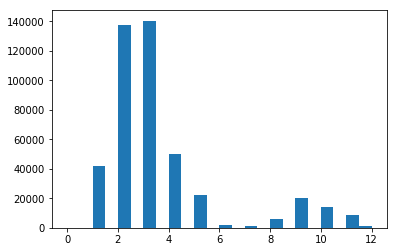

In [33]:
plt.hist(df['user_group_id'],label='age',bins=24)

In [34]:
df.columns

Index(['user_id', 'product', 'campaign_id', 'webpage_id', 'product_category_1',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click', 'day'],
      dtype='object')

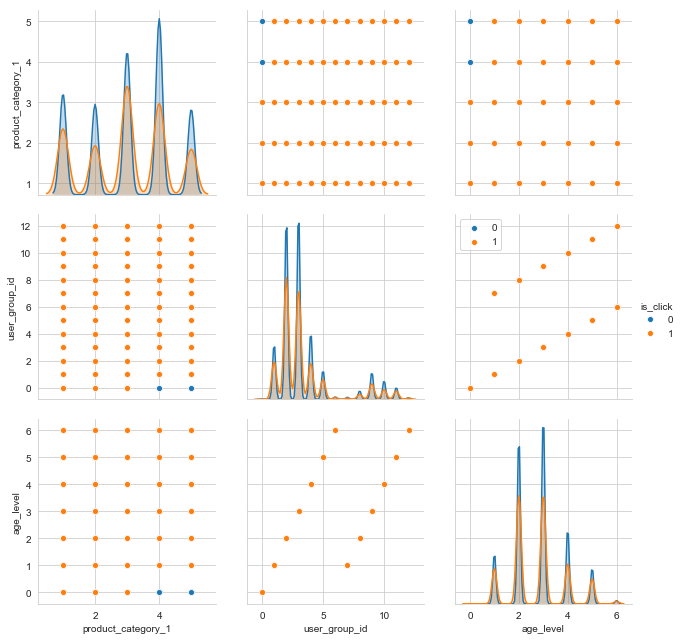

In [36]:
# try to find correlation between product category and user group id and age level by using scatterplot.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="is_click", height=3,vars=['product_category_1','user_group_id','age_level',]);
plt.legend()
plt.show()

In [40]:
# nothing can be concluded from here.
# now we will try mean median mode and different unique values.
# for this we need to set some benchmarks.
# check amexpertv2 for next steps.
corr = df.corr()

In [41]:
corr

,user_id,product_category_1,user_group_id,age_level,user_depth,city_development_index,var_1,is_click,day
user_id,1.000000,0.030123,0.045024,0.047687,-0.011238,-0.034073,0.057453,-0.004155,0.003960
product_category_1,0.030123,1.000000,0.093174,0.152602,0.002871,0.021651,0.050291,-0.016593,0.153452
user_group_id,0.045024,0.093174,1.000000,0.635146,-0.012627,0.043475,0.031456,-0.007815,0.001851
age_level,0.047687,0.152602,0.635146,1.000000,0.022386,0.002434,0.121815,-0.009681,0.012001
user_depth,-0.011238,0.002871,-0.012627,0.022386,1.000000,-0.055224,0.105176,-0.000952,0.008139
city_development_index,-0.034073,0.021651,0.043475,0.002434,-0.055224,1.000000,-0.129241,-0.005686,-0.004070
var_1,0.057453,0.050291,0.031456,0.121815,0.105176,-0.129241,1.000000,0.011910,0.004797
is_click,-0.004155,-0.016593,-0.007815,-0.009681,-0.000952,-0.005686,0.011910,1.000000,-0.020434
day,0.003960,0.153452,0.001851,0.012001,0.008139,-0.004070,0.004797,-0.020434,1.000000


In [43]:
# correlations also didn't work. 
train.to_csv('./modified/train_v1.csv',index=False)